In [59]:
import itertools
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import MeanShift

In [60]:
data = pd.read_csv('../data/processed/processed.csv')

In [61]:
data_rows = len(data)
scores = []
bandwidths = np.arange(0.05, 1.5, 0.05)


for bandwidth in bandwidths: 
    ms = MeanShift(bandwidth=bandwidth)
    prediction = ms.fit_predict(X=data)
    n_clusters = len(np.unique(prediction))
    
    if n_clusters != 1 and n_clusters != data_rows:
        sc = silhouette_score(data, prediction)
        db = davies_bouldin_score(data, prediction)
        ch = calinski_harabasz_score(data, prediction)
        scores.append((bandwidth, sc, db, ch, prediction,n_clusters))

In [62]:
tested_bandwidths, scs, dbs, chs, predictions, n_clusters = zip(*scores)
placings_per_alt = {}

for i in range(len(scores)):
    placings_per_alt[tested_bandwidths[i]] = {
        'bandwidth':tested_bandwidths[i],
        'silhouette coefficient': scs[i],
        'davies-bouldin index': dbs[i],
        'calinski-harabasz index': chs[i],
        'prediction': predictions[i],
        'clusters': n_clusters[i]
    }

sorted_by_max_sc = sorted(scores, key=lambda score: score[1], reverse=True)
sorted_by_min_db = sorted(scores, key=lambda score: score[2], reverse=False)
sorted_by_max_ch = sorted(scores, key=lambda score: score[3], reverse=True)

for index, score in enumerate(sorted_by_max_sc):
    placings_per_alt[score[0]]['max_sc'] = index

for index, score in enumerate(sorted_by_min_db):
    placings_per_alt[score[0]]['min_db'] = index

for index, score in enumerate(sorted_by_max_ch):
    placings_per_alt[score[0]]['max_ch'] = index

In [76]:
def overall_placing(score):
    alt = placings_per_alt[score[0]]
    return (alt['max_sc'] + alt['min_db'] + alt['max_ch']+3) / 3

sorted_scores_on_overall = sorted(scores, key=overall_placing, reverse=False)

for index, score in enumerate(sorted_scores_on_overall):
    placings_per_alt[score[0]]['overall'] = index


models = sorted(placings_per_alt.values(), key=lambda alt: alt['overall'], reverse=False)
models_in_tuples = [model.values() for model in models]


In [113]:
sorted_bandwidths, sorted_scs, sorted_dbs, sorted_chs, sorted_predictions, sorted_clusters, sorted_placing_sc, sorted_placing_db, sorted_placing_ch, sorted_overall = zip(*models_in_tuples)

In [126]:
def points_in_clusters(distribution):
    amount_of_points_in_cluster = {}
    for cluster_id in distribution:
        if cluster_id in amount_of_points_in_cluster:
            amount_of_points_in_cluster[cluster_id] += 1
        else:
            amount_of_points_in_cluster[cluster_id] = 1
    points_in_cluster_descending = sorted(list(amount_of_points_in_cluster.values()), reverse=True)
    return tuple(points_in_cluster_descending)

In [127]:
def print_info(i):
    print(
        f'{sorted_overall[i]:>2}. '
        f'Bandwidth: {sorted_bandwidths[i]:.2f}. '
        f'Scores: SC={sorted_scs[i]: 5.2f}, DB={sorted_dbs[i]: 5.2f}, CH={sorted_chs[i]: 7.2f}. '
        f'Clusters: {sorted_clusters[i]:>3}. Distribution: {str(points_in_clusters(sorted_predictions[i]))[:20]:<20}'
    )

In [128]:
top_amount = min(30,len(scores))

for i in range(top_amount):
    print_info(i)

 0. Bandwidth: 0.90. Scores: SC= 0.54, DB= 0.33, CH=   8.04. Clusters:   2. Distribution: (209, 1)            
 1. Bandwidth: 0.95. Scores: SC= 0.54, DB= 0.33, CH=   8.04. Clusters:   2. Distribution: (209, 1)            
 2. Bandwidth: 0.10. Scores: SC= 0.01, DB= 0.07, CH= 168.01. Clusters: 208. Distribution: (2, 2, 1, 1, 1, 1, 1
 3. Bandwidth: 0.15. Scores: SC= 0.03, DB= 0.18, CH=  61.48. Clusters: 201. Distribution: (3, 3, 2, 2, 2, 2, 2
 4. Bandwidth: 1.00. Scores: SC= 0.54, DB= 0.33, CH=   8.04. Clusters:   2. Distribution: (209, 1)            
 5. Bandwidth: 1.05. Scores: SC= 0.54, DB= 0.33, CH=   8.04. Clusters:   2. Distribution: (209, 1)            
 6. Bandwidth: 0.20. Scores: SC= 0.06, DB= 0.36, CH=  25.22. Clusters: 178. Distribution: (6, 5, 5, 3, 3, 3, 2
 7. Bandwidth: 1.10. Scores: SC= 0.54, DB= 0.33, CH=   8.04. Clusters:   2. Distribution: (209, 1)            
 8. Bandwidth: 0.25. Scores: SC= 0.06, DB= 0.50, CH=  17.00. Clusters: 142. Distribution: (17, 9, 8, 6, 5, 5, 
 

In [129]:
def is_trivial(i):
    return (
        sorted_clusters[i] >= 208
        or points_in_clusters(sorted_predictions[i])[0] >= 208
        or len(points_in_clusters(sorted_predictions[i])) >= 100
    )

top_no_trivial = [i for i in range(len(sorted_overall)) if not is_trivial(i)][:top_amount]

for i in top_no_trivial:
    print_info(i)


11. Bandwidth: 0.60. Scores: SC= 0.17, DB= 1.44, CH=  25.68. Clusters:   7. Distribution: (143, 30, 22, 7, 4, 
14. Bandwidth: 0.50. Scores: SC= 0.11, DB= 1.08, CH=  19.20. Clusters:  13. Distribution: (99, 79, 7, 7, 5, 2,
15. Bandwidth: 0.55. Scores: SC= 0.12, DB= 1.10, CH=  22.34. Clusters:  11. Distribution: (96, 82, 8, 8, 5, 3,
17. Bandwidth: 0.35. Scores: SC= 0.06, DB= 0.75, CH=  14.13. Clusters:  56. Distribution: (42, 38, 27, 12, 10,
18. Bandwidth: 0.40. Scores: SC= 0.10, DB= 0.91, CH=  16.90. Clusters:  33. Distribution: (51, 48, 47, 7, 6, 5
19. Bandwidth: 0.30. Scores: SC= 0.05, DB= 0.65, CH=  14.05. Clusters:  93. Distribution: (31, 16, 15, 12, 11,
21. Bandwidth: 0.65. Scores: SC= 0.21, DB= 1.48, CH=  13.84. Clusters:   3. Distribution: (192, 16, 2)        
22. Bandwidth: 0.45. Scores: SC= 0.06, DB= 1.09, CH=  15.02. Clusters:  20. Distribution: (96, 69, 6, 5, 5, 5,


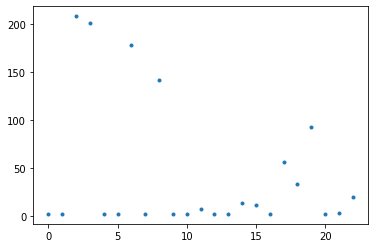

In [130]:
plt.plot(sorted_overall, sorted_clusters,'.')
plt.show()


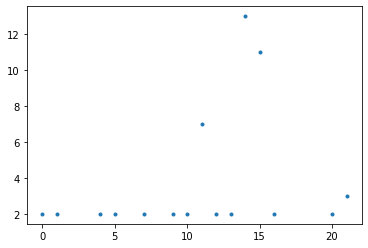

In [131]:
clusterings_under_20 = [(index, cluster_amount) for index, cluster_amount in enumerate(sorted_clusters) if cluster_amount < 20 ]
indexes_u20, cluster_amount_u20 = zip(*clusterings_under_20)

plt.plot(indexes_u20, cluster_amount_u20,'.')
plt.show()
